In [21]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels
import statsmodels.api as sm

## Import Data

In [2]:
df = pd.read_csv("Fish.csv")
df.head(50)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


## Preprocessing

In [3]:
print(df['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
df['Species'] = df['Species'].map({'Bream': 0, 'Roach': 1, 'Whitefish': 2, 'Parkki': 3, 'Perch': 4, 'Pike': 5, 'Smelt': 6})
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Species,159.0,2.880503,2.026298,0.0000,1.00000,4.0000,4.0000,6.000
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [8]:
df.duplicated().sum()

0

## Uji Normalitas Data

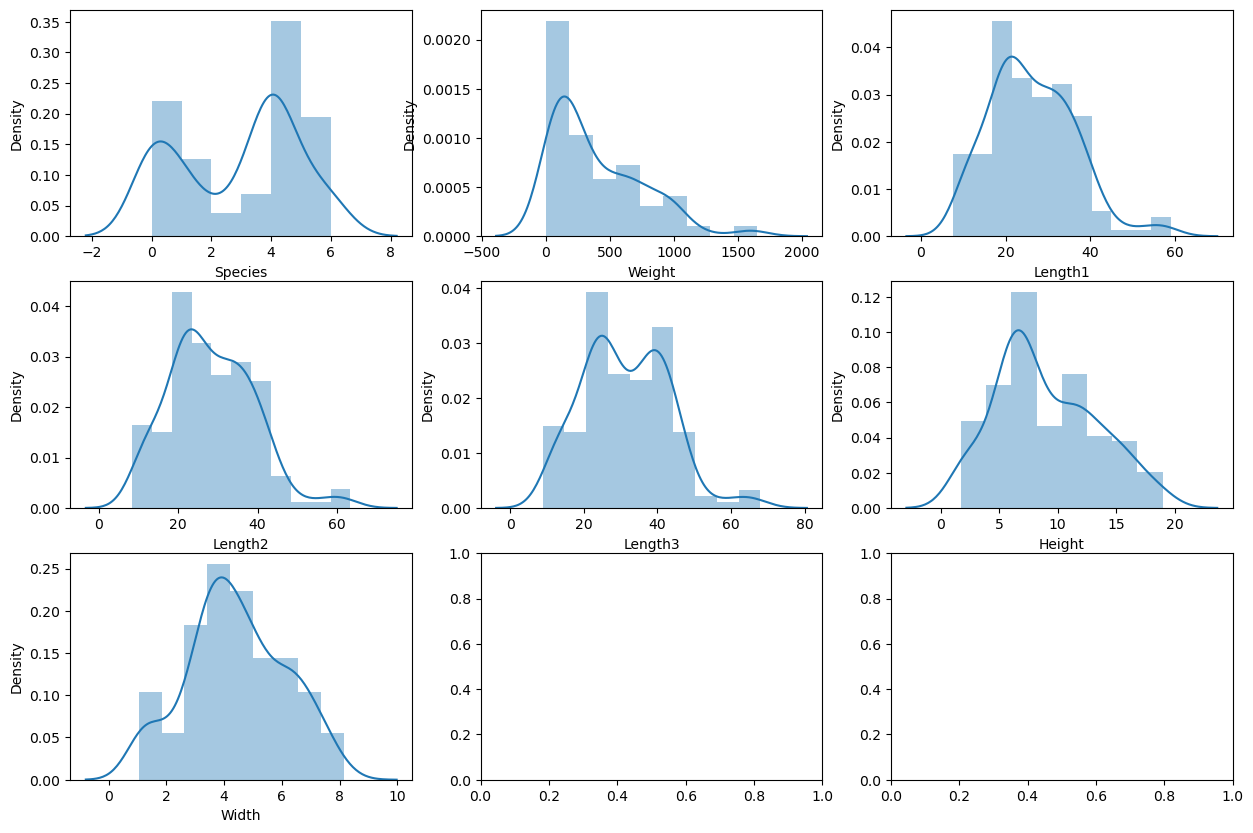

In [18]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.distplot(df["Species"], ax=axes[0, 0])
sns.distplot(df["Weight"], ax=axes[0, 1])
sns.distplot(df["Length1"], ax=axes[0, 2])
sns.distplot(df["Length2"], ax=axes[1, 0])
sns.distplot(df["Length3"], ax=axes[1, 1])
sns.distplot(df["Height"], ax=axes[1, 2])
sns.distplot(df["Width"], ax=axes[2, 0])
plt.show()

Dapat kita lihat bahwa variabel target (y) yaitu weight tidak terdistribusi normal beserta semua variabel (x) nya juga tidak ada yang berdistribusi normal. tapi dapat kita perlihatkan pada variabel width bahwa hampir membentuk sebuah lonceng.

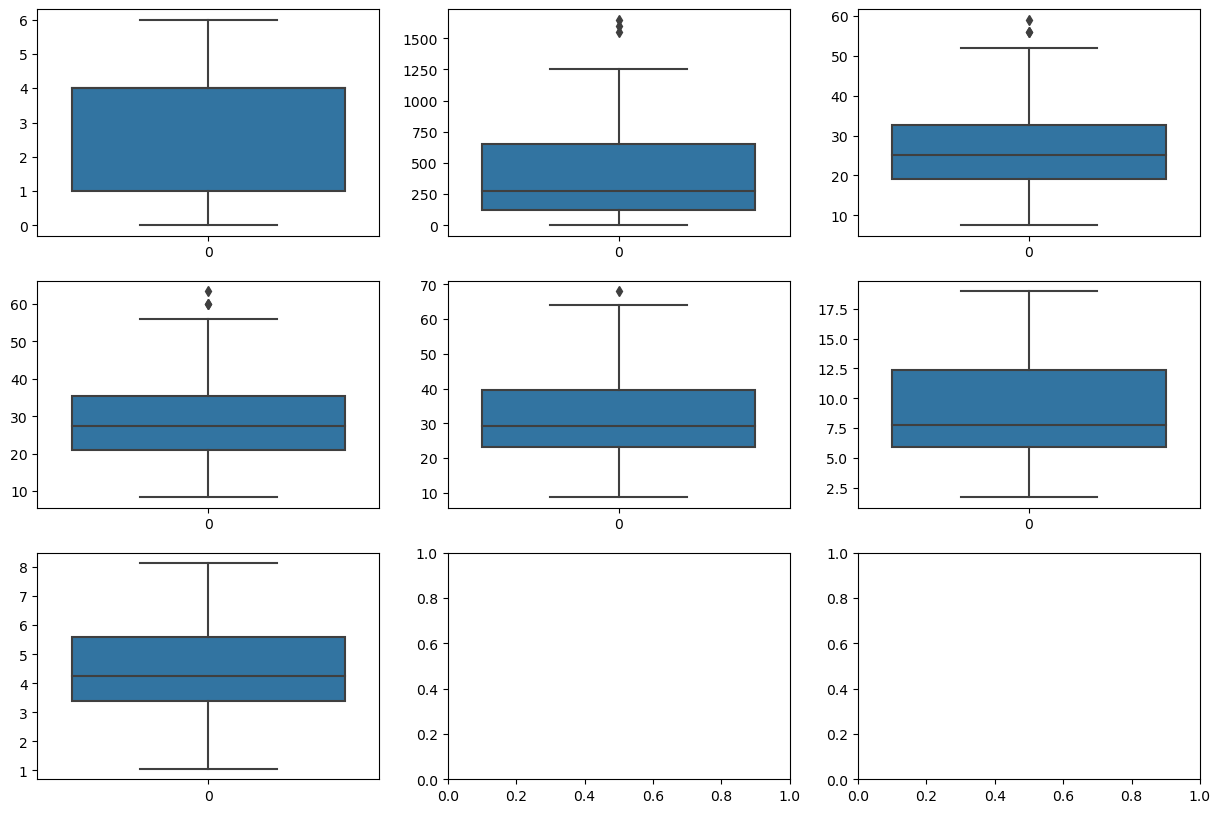

In [19]:

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(df["Species"], ax=axes[0, 0])
sns.boxplot(df["Weight"], ax=axes[0, 1])
sns.boxplot(df["Length1"], ax=axes[0, 2])
sns.boxplot(df["Length2"], ax=axes[1, 0])
sns.boxplot(df["Length3"], ax=axes[1, 1])
sns.boxplot(df["Height"], ax=axes[1, 2])
sns.boxplot(df["Width"], ax=axes[2, 0])
plt.show()

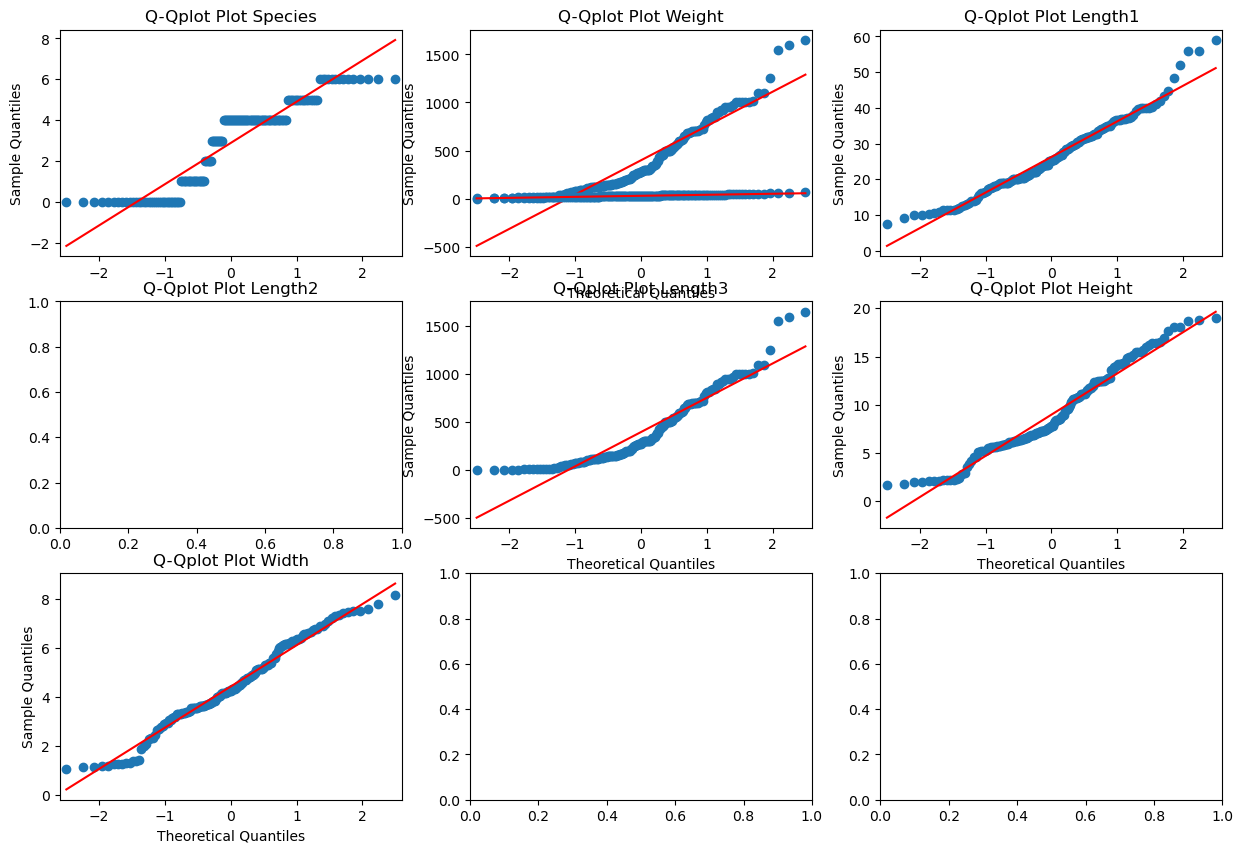

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sm.graphics.qqplot(df["Species"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Species')
axes[0, 0].set_xlabel('') 

sm.graphics.qqplot(df["Weight"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Weight')
axes[0, 1].set_xlabel('') 

sm.graphics.qqplot(df["Length1"].dropna(), line='s', ax=axes[0, 2])
axes[0, 2].title.set_text('Q-Qplot Plot Length1')
axes[0, 2].set_xlabel('') 

sm.graphics.qqplot(df["Length2"].dropna(), line='s', ax=axes[0, 1])
axes[1, 0].title.set_text('Q-Qplot Plot Length2')
axes[1, 0].set_xlabel('') 

sm.graphics.qqplot(df["Weight"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot Length3')

sm.graphics.qqplot(df["Height"].dropna(), line='s', ax=axes[1, 2])
axes[1, 2].title.set_text('Q-Qplot Plot Height')

sm.graphics.qqplot(df["Width"].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot Width')


plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal

H1 : data tidak berdistribusi normal

In [29]:
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.864, p=0.000
Tolak H0, Species tidak berdistribusi normal
Statistics=0.883, p=0.000
Tolak H0, Weight tidak berdistribusi normal
Statistics=0.971, p=0.002
Tolak H0, Length1 tidak berdistribusi normal
Statistics=0.973, p=0.003
Tolak H0, Length2 tidak berdistribusi normal
Statistics=0.973, p=0.003
Tolak H0, Length3 tidak berdistribusi normal
Statistics=0.961, p=0.000
Tolak H0, Height tidak berdistribusi normal
Statistics=0.979, p=0.015
Tolak H0, Width tidak berdistribusi normal


## Uji Linearitas

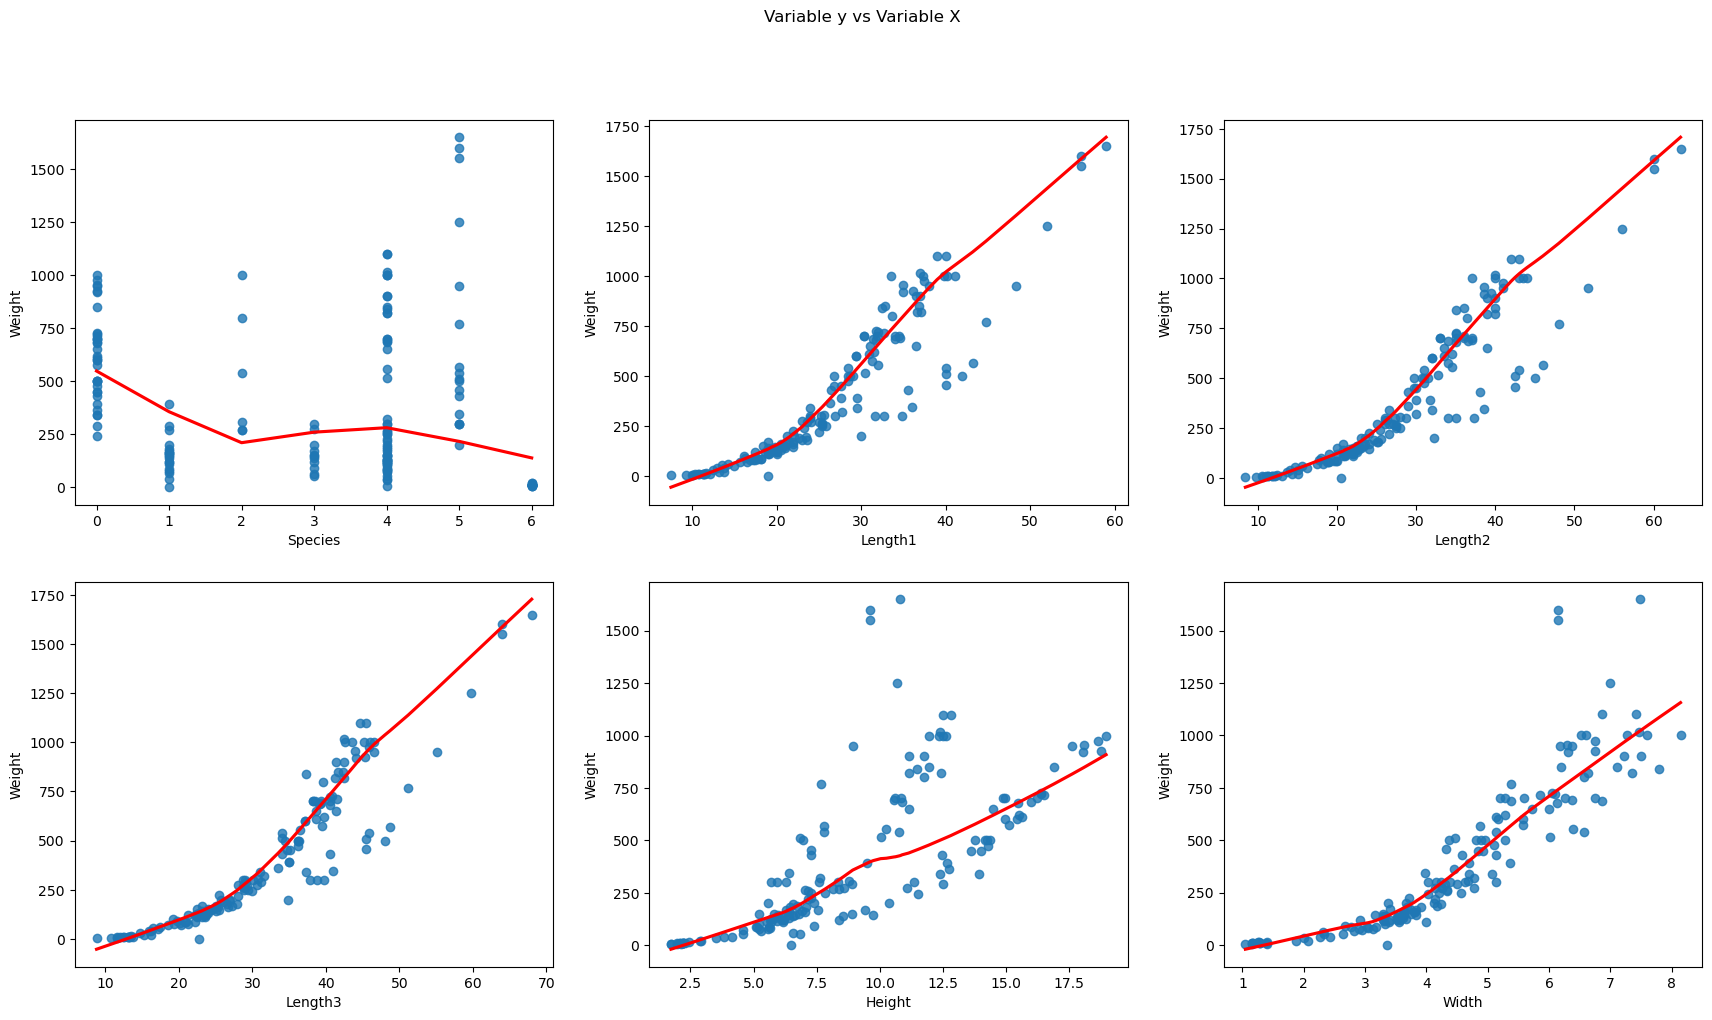

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(21, 11))
fig.suptitle('Variable y vs Variable X')

sns.regplot(x=df["Species"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=df["Length1"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=df["Length2"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 2])
sns.regplot(x=df["Length3"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=df["Height"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])
sns.regplot(x=df["Width"], y=df["Weight"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 2])
plt.show()

## Cek Korelasi

<Axes: >

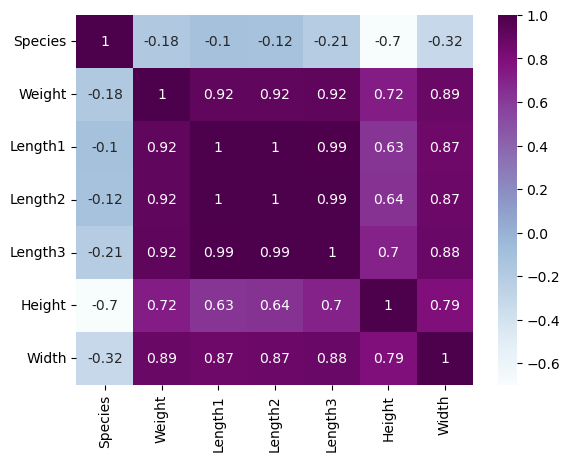

In [43]:
sns.heatmap(df.corr(), cmap="BuPu", annot=True,)

In [44]:
korelasi = df.corr()["Weight"].sort_values()
korelasi

Species   -0.176783
Height     0.724345
Width      0.886507
Length1    0.915712
Length2    0.918618
Length3    0.923044
Weight     1.000000
Name: Weight, dtype: float64

Dapat dilihat bahwa korelasi antara variabel y dengan variabel x itu sangat tinggi kecuali species

## Scalling Data

In [45]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-1.42605105, -0.43807217, -0.30578858, ..., -0.10602023,
         0.59657867, -0.23652895],
       [-1.42605105, -0.30356218, -0.22550724, ..., -0.00233668,
         0.82126055, -0.06657895],
       [-1.42605105, -0.16344761, -0.23554241, ..., -0.01097698,
         0.79734129,  0.16579317],
       ...,
       [ 1.54436969, -1.08203874, -1.41969211, ..., -1.50574813,
        -1.56668655, -1.88140219],
       [ 1.54436969, -1.06102155, -1.30930527, ..., -1.38478399,
        -1.42724336, -1.39856804],
       [ 1.54436969, -1.0604611 , -1.24909427, ..., -1.29838103,
        -1.41334117, -1.51043989]])

In [46]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-1.426051,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-1.426051,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-1.426051,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-1.426051,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,-1.426051,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...,...
154,1.544370,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,1.544370,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,1.544370,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,1.544370,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


## Modelling

In [47]:
x = scaled_df.drop(columns="Weight")
y = scaled_df["Weight"]

### Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [50]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  127
Ukuran X test  32
Ukuran y train  127
Ukuran y test  32


## Linear Regression

In [52]:
lr = LinearRegression()
results = lr.fit(x,y)
y_hat = lr.predict(x)

In [60]:
predictions = lr.predict(X_test)

df_lr = pd.DataFrame(X_test, columns=list_columns)
df_lr["actual_weight"] = y_test
df_lr["prediction_weight"] = predictions
df_lr.head(10)

,Species,Length1,Length2,Length3,Height,Width,actual_weight,prediction_weight
19,-1.426051,0.476954,0.475941,0.645685,1.287897,0.779601,0.705263,0.653809
144,1.049300,3.286801,3.274892,3.177292,0.430876,1.822389,3.507554,2.530782
61,0.059159,-1.279200,-1.283934,-1.272460,-0.496990,-1.244268,-0.962101,-1.129302
108,0.554229,0.155829,0.148305,0.032224,-0.317221,0.210720,-0.219493,0.069210
120,0.554229,1.079064,1.084409,0.974017,0.645728,1.670648,1.405836,1.240630
102,0.554229,-0.105085,-0.104443,-0.218344,-0.151659,0.428335,-0.275539,0.039289
37,-0.930981,-0.877793,-0.900132,-0.866366,-0.794670,-0.900381,-0.897648,-1.148463
135,1.049300,1.380119,1.318435,1.233226,-0.502256,0.024704,0.312942,0.788207
69,0.059159,-0.506492,-0.506968,-0.468913,0.321765,-0.448609,-0.555768,-0.233399
54,-0.930981,0.326427,0.307442,0.325995,0.120300,0.557880,-0.023333,0.137764


## Evaluate Model

In [61]:
# R-square
print('R-square :', metrics.r2_score(df_lr['actual_weight'], df_lr['prediction_weight']))

R-square : 0.9153798744054726


In [62]:
# MSE
print('MSE :', metrics.mean_squared_error(df_lr['actual_weight'], df_lr['prediction_weight']))

MSE : 0.0945647516276254


In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)
y_pred

array([ 626.07044855,   -4.41823031,  230.74890176,  163.59622708,
        203.36606742,  472.27521617,   59.51334266, -160.18812778,
        553.43517725,  760.29204194,  648.44946864,  403.37206518,
        813.87322655,  876.88853973, -285.54023547,  859.9224127 ,
        833.16577224,  275.88043705,  806.43248413,  858.39400211,
        134.09930728,  378.7906264 ,  778.14838126,  -19.26024839,
        790.99607014,  465.55342804,  160.90360735,  852.18084325,
        741.60516615,  749.09170904,  880.89889693,   58.14452197])

In [43]:
print("Train Accuracy:", lr.score(X_train,y_train))
print("Test Accuracy:", lr.score(X_test,y_pred))

Train Accuracy: 0.8920483465625735
Test Accuracy: 1.0


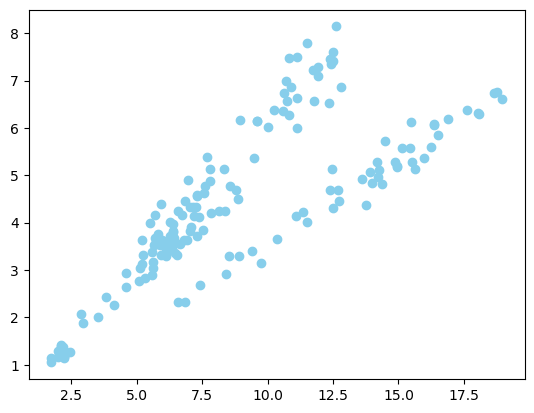

In [45]:
plt.scatter(df["Height"],df["Width"],color="skyblue")

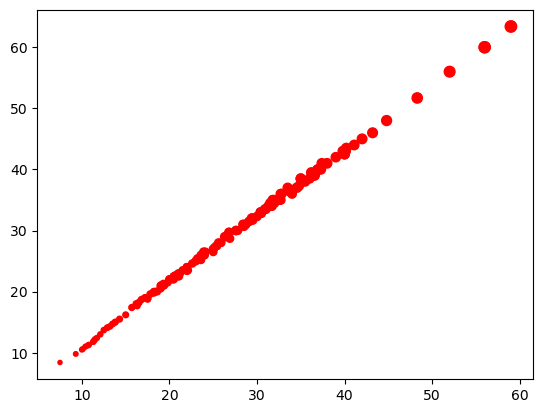

In [47]:
plt.scatter(df["Length1"],df["Length2"], df["Length3"], color="red")